# Part 2 : Part 2: 2D Object Recognition using CNNs


In [19]:
#!pip install cairo
!pip3 install pycairo


In [3]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


# Import libraries & data

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy


%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (12, 6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings

warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler

In [21]:
!pip install cairo


ERROR: Could not find a version that satisfies the requirement cairo (from versions: none)
ERROR: No matching distribution found for cairo


In [11]:
import scipy.io
import cairo 
import argparse
import numpy as np
from paint_studio.painter import drawStimuli
from fio.saver import saveData

# PARAMETERS ----------------------------------------------------------------------------
parser = argparse.ArgumentParser()
# general parameters
parser.add_argument('--outdir','-o', type=str, nargs='+', default='./output/', help='Output directory (default: ./output/')
parser.add_argument('--name', type=str, nargs='+', default=['stim2D'], help='File Name (default: stim2D')
parser.add_argument('--parallel', type=int, nargs=1, default=0, help='Do Parallel Processing (default: 0)')

# canvas parameters
parser.add_argument('--canvas_size', type=int, nargs='+', default=[128, 128], help='Size of Image Canvas (default: 128x128px)')
parser.add_argument('--canvas_bgcol', type=float, nargs='+', default=[0., 0., 0.], help='Background Colour of Image Canvas (RGB,default: 0 0 0)')

# stimuli parameters
parser.add_argument('--num_stimuli', type=int, nargs=1, default=1, help='Number of stimuli per shape to generate (default: 1)') 
parser.add_argument('--num_transformations', type=int, default=0, help='Number of linearly spaced transformations (default: 0)')
parser.add_argument('--shapes', type=str, nargs='+', default=['rect','ellipse', 'oval', 'poly6', 'poly7', 'star5', 'star8' ], help='Shapes (rect, polyNUM,starNUM, ellipse) ')
parser.add_argument('--to_transform', type=str, nargs='+', default=[], help='Dimensions to transform with num_transformations. All other dimensions kept constant (scale,rota,trx,try,colour; default: None)')
parser.add_argument('--stim_poly_size', type=int, default=20, help='Polygon "Radius"  (default: 50)')
parser.add_argument('--stim_star_size', type=float, nargs='+', default=[20, 10], help='Star Radii (outer, inner; default: [50,25])')
parser.add_argument('--stim_ellipse_ratio', type=float, nargs='+', default=[1, 0.5], help='Scaling of Circle to generate Ellipse')
parser.add_argument('--stim_rect_ratio', type=float, nargs='+', default=[0.5, 1], help='Scaling of square to generate rect')
parser.add_argument('--stim_scale', type=float, nargs='+', default=[1, 1], help='Stimulus Scaling (default: (1,1)')
parser.add_argument('--stim_rota', type=float, default=0, help='Stimulus Rotation (deg; default: 0)')
parser.add_argument('--stim_trx', type=float, default=125, help='Stimulus Translation along x (default: centre)')
parser.add_argument('--stim_try', type=float, default=125, help='Stimulus Translation along y (default: 0)')
parser.add_argument('--stim_colour', type=float, nargs='+', default=[1., 1., 1.], help='Stimulus Colour (default: [1.,1.,1.]')

# transformation ranges
parser.add_argument('--rng_ratio', type=float, nargs='+', default=[0.2, 5.], help='Shape width to height ratio (min,max; defaults:[0.2, 5.]')
parser.add_argument('--rng_trx', type=float, nargs='+', default=[0.10, 0.90], help='Translation along x in decimal fractions (min,max; defaults:[0.05, 0.95]')
parser.add_argument('--rng_try', type=float, nargs='+', default=[0.10, 0.90], help='Translation along y in decimal fractions (min,max; defaults:[0.05, 0.95]')
parser.add_argument('--rng_rota', type=int, nargs='+', default=[-45, 45], help='Rotation in deg (min,max; defaults:[-45, 45]')
parser.add_argument('--rng_scale', type=float, nargs='+', default=[0.5, 1.5], help='Scale decimal fractions (min,max; defaults:[0.2, 1.]')

FLAGS, _ = parser.parse_known_args() # ignore unspecified args
FLAGS.rng_trx = np.multiply(FLAGS.rng_trx, FLAGS.canvas_size)
FLAGS.rng_try = np.multiply(FLAGS.rng_try, FLAGS.canvas_size)

def main(argv=None):	
    all_IMGs, all_idces = drawStimuli(FLAGS)
    data = {}
    data['images'] = all_IMGs # store all the images
    data['params'] = vars(FLAGS) # store all the parameters
    data['idces'] = all_idces  # for each image, store the feature values. (feature correspondence encoded in FLAGS.to_transform (same order))
    saveData(data, FLAGS.to_transform, FLAGS.shapes, FLAGS.outdir)

if __name__ == '__main__':
    main()


-----new stimulus-------
-----new stimulus-------
-----new stimulus-------
-----new stimulus-------
-----new stimulus-------
-----new stimulus-------
-----new stimulus-------


In [13]:
 main.py

SyntaxError: invalid syntax (1578409569.py, line 1)

In [26]:
import scipy.io

# .mat dosyasını yükleyin
#mat_data = scipy.io.loadmat('shapes_ellipse_dims_.mat')
mat_data = scipy.io.loadmat('C:\\Users\\bulen\\Desktop\\GITHUB ANA KLASOR\\GTU_Deep_Learning_Homeworks\\Homework_1\\Part_2\\2D-Shape-Generator-master\\output\\shapes_ellipse_dims_.mat')


In [32]:
images = mat_data['images']  # Görüntü matrisleri
parameters = mat_data['params']  # Parametreler
#labels = mat_data['labels']  # Etiketler (varsa)


In [ ]:
import scipy.io
import matplotlib.pyplot as plt

# .mat dosyasını yükleyin
mat_data = scipy.io.loadmat('shapes_ellipse_dims_.mat')

# Görüntü verisini alın (örneğin, ilk görüntüyü alalım)
image_matrix = mat_data['images'][0]  # MAT dosyasından bir görüntü matrisi alın

# Görüntü matrisini bir görüntüye dönüştürün
plt.imshow(image_matrix)  # Renk haritasını belirtmeden basitçe görüntüyü çizin
plt.title('Sample Image')  # Görüntü başlığı
plt.show()


TypeError: Invalid shape (1, 250, 250, 3) for image data

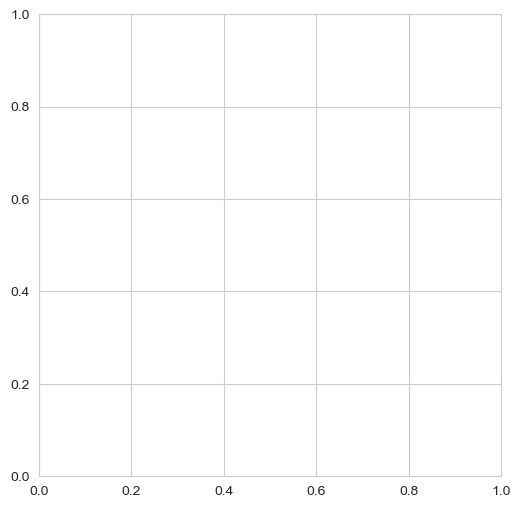

In [33]:
import matplotlib.pyplot as plt

for i in range(images.shape[0]):
    image_matrix = images[i]  # MAT dosyasından bir görüntü matrisi alın
    # Görüntü matrisini bir görüntüye dönüştürün
    plt.imshow(image_matrix, cmap='gray')  # Örnek olarak, 'gray' renk haritasını kullanıyoruz
    plt.title(f'Image {i+1}')  # Görüntü başlığı
    plt.show()

